# Data Science Intern @ LetsGrowMore
## Author : Ashutosh Pradhan
## Task 1
## Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris 


## 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



## 2. Load data

In [3]:
data=pd.read_csv("iris.csv")

## 3. undestanding the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal length   150 non-null    float64
 1   sepal width    150 non-null    float64
 2    petal length  150 non-null    float64
 3   petal width    150 non-null    float64
 4   class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data. describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 4. Data Pre processing

In [8]:
#label encode
data=data.replace(to_replace={'class':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#change data tpe of class attribut to catgoicak

data['class'] = data['class'].astype('category').cat.codes

## 5. Explantory data analysis

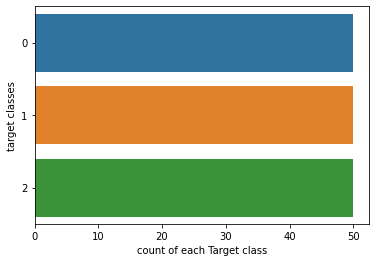

In [10]:
sns.countplot(y=data['class'],data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target class')
plt.show()

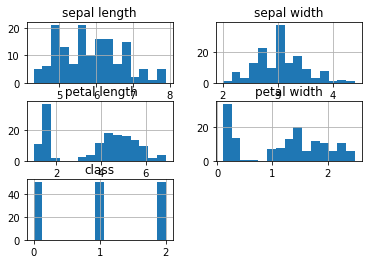

In [11]:
#check the destibution of all featues
data.hist(bins=15)
plt.title('Featue distibution')
plt.show()

<AxesSubplot:>

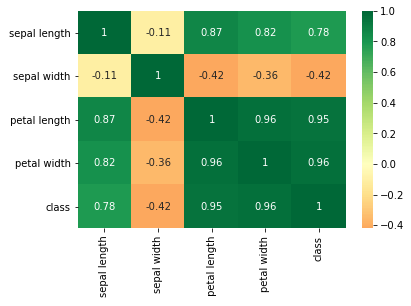

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',center=0)

## 6.Model Building

In [13]:
# shuffle the DataFrame rows
data = data.sample(frac = 1)
data. head()

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,0.1,0
126,6.2,2.8,4.8,1.8,2
132,6.4,2.8,5.6,2.2,2
70,5.9,3.2,4.8,1.8,1
139,6.9,3.1,5.4,2.1,2


In [14]:
x = data.drop(['class'], axis =1)
y = data['class']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [16]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

### a.Logistic regression

In [17]:
#Create an instance and fit the model
reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')

#Fitting the train and test data
reg.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [18]:
y_pred = reg.predict(x_test)
y_proba = reg.predict_proba(x_test)
y_pred


array([2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1,
       0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2,
       1], dtype=int8)

In [19]:
score_lr= reg.score(x_test,y_test)
print(score_lr)

0.9777777777777777


In [20]:
actual=y_test
predicted=y_pred
results=confusion_matrix(actual,predicted)
print('confusion matrix')
print(results)


confusion matrix
[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]


### b. SVM

In [21]:
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [22]:
# generate evaluation metrics
print ("Train - Accuracy :", accuracy_score(y_train, clf.predict(x_train)))
print ("Train - Confusion matrix :\n",confusion_matrix(y_train, clf.
predict(x_train)))


Train - Accuracy : 0.9904761904761905
Train - Confusion matrix :
 [[35  0  0]
 [ 0 35  1]
 [ 0  0 34]]


In [23]:
#print ("Train - classification report :", classification_report
#(y_train, clf.predict(x_train)))
print ("Test - Accuracy :", accuracy_score(y_test, clf.predict
(x_test)))
print ("Test - Confusion matrix :\n",confusion_matrix(y_test, clf.
predict(x_test)))

Test - Accuracy : 0.9777777777777777
Test - Confusion matrix :
 [[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


### prdection on given input

In [24]:
num=[[6.4,2.9,4.3,1.3]]
num

[[6.4, 2.9, 4.3, 1.3]]

In [25]:
num=sc.fit_transform(num)

In [26]:
u=clf.predict(num)
u[0]

1

In [27]:
rslt = reg.predict(num)
rslt[0]

1

# Thank You  , LetsGrowMore